# Visualizing the Galactic Model Data

The purpose of this notebook is to demonstrate how to load and plot the Trilegal galactic model data produced by calculate_stellar_density.py.

In [6]:
from os import path
import json
from astropy_healpix import HEALPix
from astropy import units as u 
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord 
%matplotlib inline

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The JSON file contains the stellar density data in the form of a set of HEALpixel skymap arrays, one for each filter, prism and grism.  The densities are given in log10 form. 

In [7]:
file_path = path.join(root_dir, 'trilegal_model_data', 'extinction', 'trilegal_nir_stellar_density_extinction.json')
with open(file_path, 'r') as f:
    trilegal_data = json.load(f)

trilegal_data

{'label': 'Trilegal_v1.6_log10_density',
 'nside': 64,
 'healpix_resolution_deg': 0.8392936452111668,
 'n_healpix': 49152,
 'healpix_map_F062': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

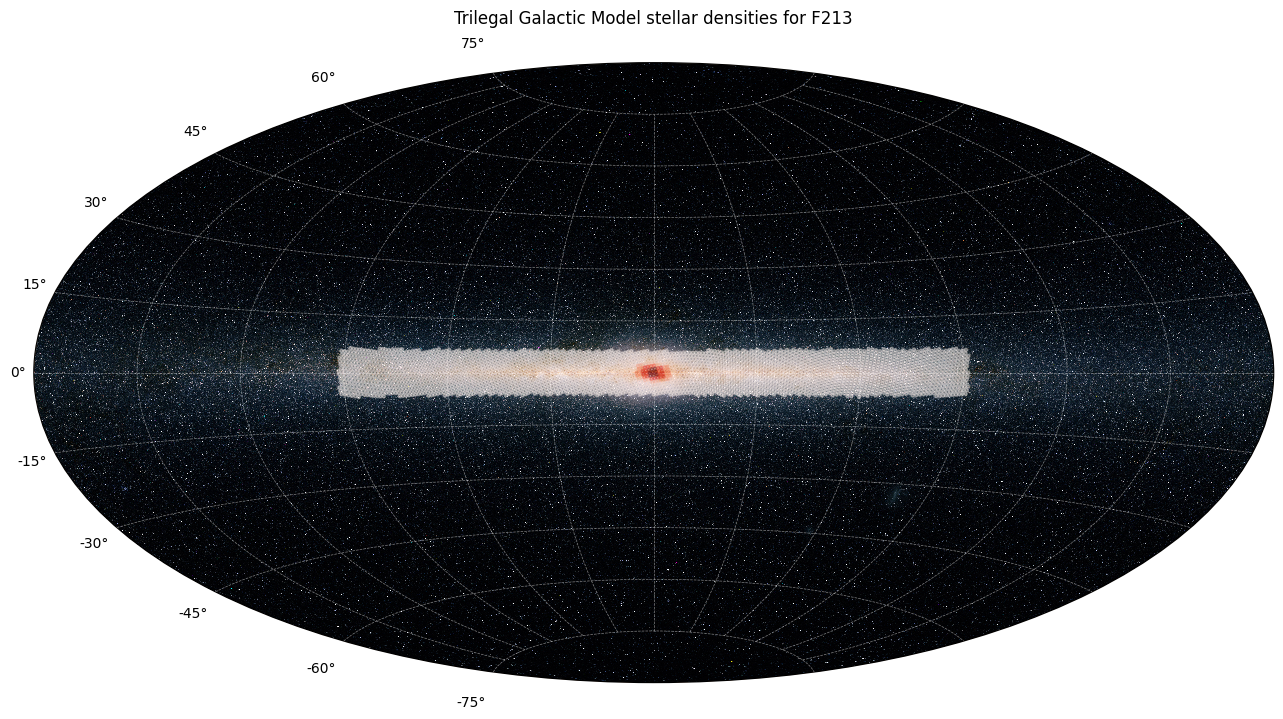

In [8]:
optic = 'F213'

map = np.array(trilegal_data['healpix_map_'+optic])

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='infrared', figsize=(16,10))
mw1.title = 'Trilegal Galactic Model stellar densities for ' + optic
proj = HEALPix(nside=trilegal_data['nside'], order='ring', frame='icrs')
pixels = np.where(map > 0)[0]
s = proj.healpix_to_skycoord(pixels)
mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, 
            c=map[pixels], 
            cmap='Reds', s=5, alpha=0.4)
plt.rcParams.update({'font.size': 22})

plt.show()

## Density projections

It's illustrative to generate plots of how the stellar density in the Galaxy varies as a function of (l,b).  
To produce this from the density map, we can build a grid of HEALpixels across l,b ranges and identify which HEALpixels cover those positions.

In [43]:
l = 0.0
b_range = np.arange(0.0, 10.0, 1.0)

b_positions = SkyCoord(l * u.deg, b_range * u.deg, frame='galactic') 
b_positions = b_positions.transform_to('icrs')
print('b: ', b_positions)

b = 0.0
l_range = np.arange(0.0, 20.0, 1.0) 

l_positions = SkyCoord(l_range * u.deg, b * u.deg, frame='galactic') 
l_positions = l_positions.transform_to('icrs')
print('l: ', l_positions)

b:  <SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), (265.43456651, -28.41167016),
     (264.47377034, -27.88035232), (263.52241299, -27.34244015),
     (262.58030185, -26.79814568), (261.64723921, -26.247677  ),
     (260.72302285, -25.69123835), (259.80744664, -25.12903002),
     (258.90030104, -24.56124846), (258.00137364, -23.98808625)]>
l:  <SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), (266.99551767, -28.08135169),
     (267.57670602, -27.22403784), (268.14900227, -26.36436248),
     (268.71283816, -25.50244626), (269.26862916, -24.63840463),
     (269.81677533, -23.77234811), (270.35766225, -22.90438265),
     (270.89166178, -22.03460992), (271.41913287, -21.16312757),
     (271.94042232, -20.2900295 ), (272.45586549, -19.41540611),
     (272.96578701, -18.53934454), (273.47050143, -17.66192887),
     (273.97031386, -16.78324036), (274.46552058, -15.90335762),
     (274.95640962, -15.0223568 ), (275.44326133, -14.14031178),
     (275.9

In [44]:
# Convert SkyCoords to HEALpixel indices
proj = HEALPix(nside=trilegal_data['nside'], order='ring', frame='icrs')
b_pixels = proj.skycoord_to_healpix(b_positions)
l_pixels = proj.skycoord_to_healpix(l_positions)

In [45]:
# Fetch the stellar density values for these pixels and convert to stars per arcsec
filterset = ["F062", "F087", "F106", "F129", "F158", "F184", "F213"]

density_data = {}
for optic in filterset:
    density_map = np.array(trilegal_data['healpix_map_'+optic])
    
    # Density in stars/sq.deg.
    b_densities = density_map[b_pixels]
    l_densities = density_map[l_pixels]
    
    # Density in stars per arcsec
    b_densities /= 3600.0*3600.0
    l_densities /= 3600.0*3600.0

    density_data[optic] = {'l': l_densities, 'b': b_densities}

In [46]:
PLOT_COLORS = {
    "F062": "#5f038c",
    "F087": "#3303ab",
    "F106": "#0344a6",
    "F129": "#04b8ac",
    "F158": "#058c01",
    "F184": "#ab6902",
    "F213": "#7a0701"
}

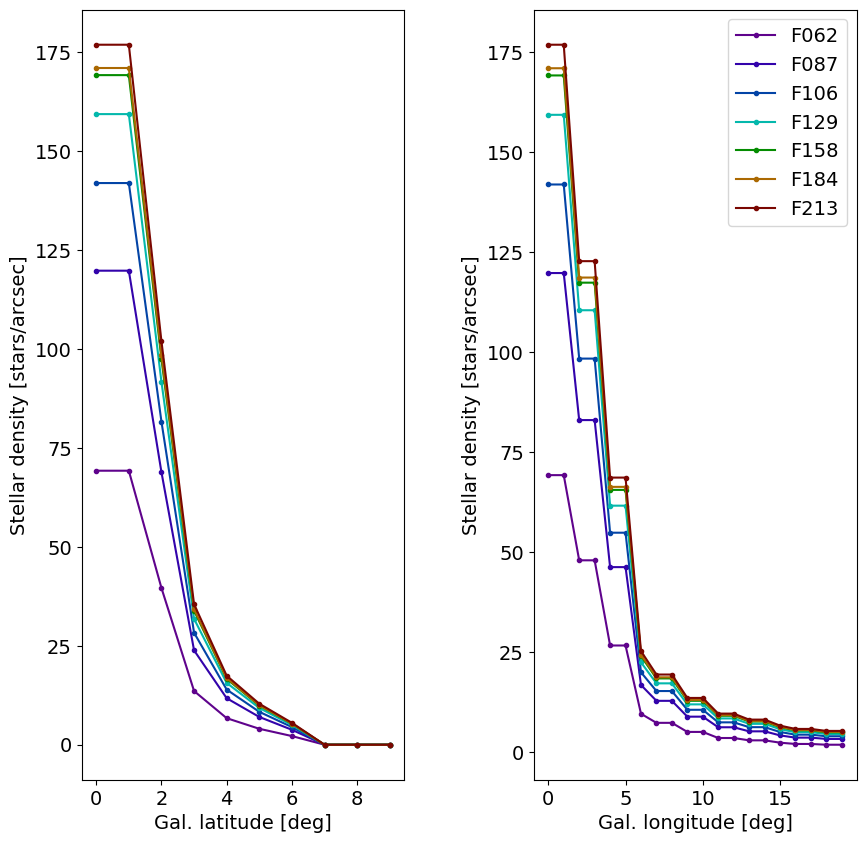

In [47]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for optic in filterset:
    axs[0].plot(b_range, density_data[optic]['b'], marker='.', c=PLOT_COLORS[optic], ls='-', label=optic)

    axs[1].plot(l_range, density_data[optic]['l'], marker='.', c=PLOT_COLORS[optic], ls='-', label=optic)

axs[0].set_xlabel('Gal. latitude [deg]', fontsize=14)
axs[0].set_ylabel('Stellar density [stars/arcsec]', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14) 

axs[1].set_xlabel('Gal. longitude [deg]', fontsize=14)
axs[1].set_ylabel('Stellar density [stars/arcsec]', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14) 
axs[1].legend(fontsize=14)

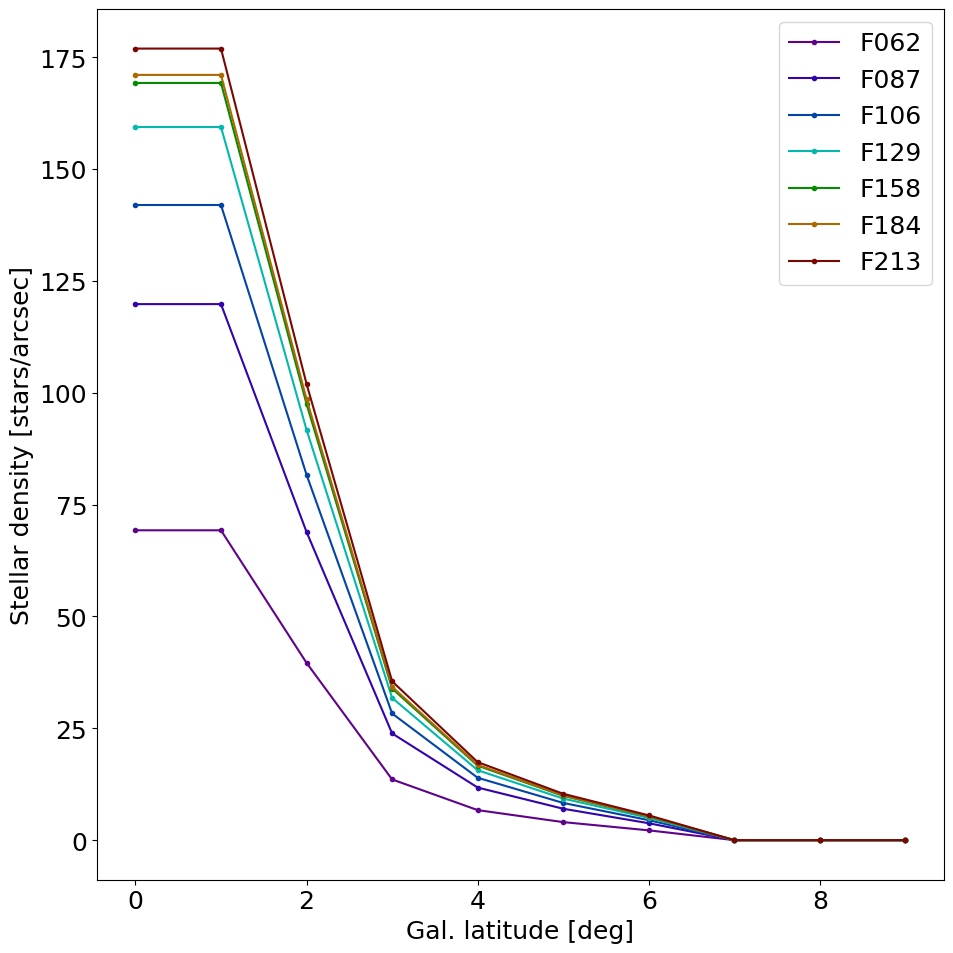

In [54]:
fig, axs = plt.subplots(1,1, figsize=(10,10))

for optic in filterset:
    axs.plot(b_range, density_data[optic]['b'], marker='.', c=PLOT_COLORS[optic], ls='-', label=optic)

axs.set_xlabel('Gal. latitude [deg]', fontsize=18)
axs.set_ylabel('Stellar density [stars/arcsec]', fontsize=18)
axs.tick_params(axis='both', labelsize=18) 

axs.legend(fontsize=18)

file_path = path.join(root_dir, 'trilegal_model_data', 'extinction', 'trilegal_nir_stellar_density_gallat.png')
plt.tight_layout()
plt.savefig(file_path)